In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import env
import wrangle, prepare, explore

import math

# Evaluate Exercises

- 1. Load the `tips` dataset from either `pydataset` or `seaborn`.

- 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- 3. Plot the residuals for the linear regression model that you made.

- 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

- 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

- 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

- 7. What is the amount of variance explained in your model?

- 8. Is your model better than the baseline model?

- 9. Create a file named `evaluate.py` that contains the following functions.
    - `plot_residuals(y, yhat)`: creates a residual plot
    - `regression_errors(y, yhat)`: returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
    - `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false
- 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.

In [2]:
from pydataset import data
from statsmodels.formula.api import ols

In [3]:
df = data("tips") # read in tips dataset from pydataset

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# use sklearn LinearRegression function to create model, fit it on to x and y - in this case, total_bill and tip
model = LinearRegression().fit(df[['total_bill']], df.tip)
df['yhat'] = model.predict(df[['total_bill']])

In [6]:
# our baseline is the mean of y, or tip
df['yhat_baseline'] = df.tip.mean()

In [7]:
df.head() # make sure new columns are there

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


In [8]:
# calculate residuals by substracting predicted value from actual value
df['residuals'] = df.tip - df.yhat

In [9]:
# same thing with baseline
df['baseline_residuals'] = df.tip - df.yhat_baseline

<AxesSubplot:ylabel='Frequency'>

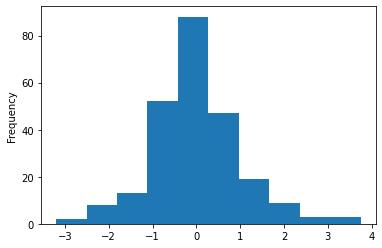

In [10]:
# number 3 asks us to plot the residuals
df.residuals.plot.hist()

<AxesSubplot:ylabel='Frequency'>

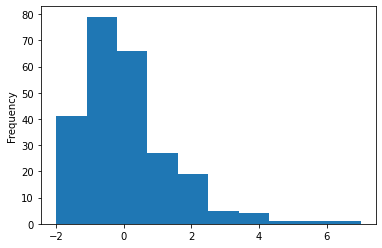

In [11]:
df.baseline_residuals.plot.hist()

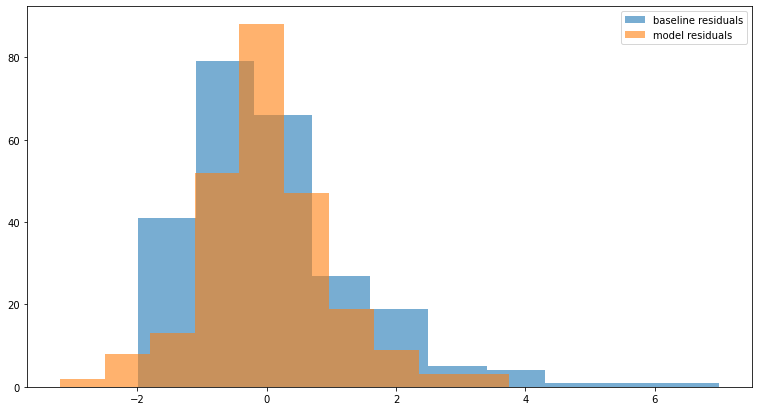

In [12]:
# here we can see the residuals stacked onto each other
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()

**Takeaway**: Residuals for linear regression model are normally distrubited. Baseline a little less so.

In [13]:
# sum of squared errors
sse = (df.residuals ** 2).sum()
sse

252.788743850776

In [14]:
# this will give us the number of samples
n = df.shape[0]

In [15]:
# mean of squared errors
mse = sse / n
mse

1.036019442011377

In [16]:
# use sklearn function
mean_squared_error(df.tip, df.yhat)

1.036019442011377

Notice it's the same number.

In [17]:
# root mean squared errors
rmse = math.sqrt(mse)
rmse

1.0178504025697377

In [18]:
# same thing for baseline
sse_baseline = (df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'''
Baseline:

sse:  {sse_baseline}
mse:  {mse_baseline}
rmse: {rmse_baseline}
''')


Baseline:

sse:  465.2124770491804
mse:  1.906608512496641
rmse: 1.3807999538298954



In [19]:
if (df.residuals ** 2).sum() < (df.baseline_residuals **2).sum():
    print("Our model performs better than the baseline.")
else:
    print("Our model does not perform better than the baseline.")

Our model performs better than the baseline.


In [20]:
# calculating the amount of variance
ess = ((df.yhat - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()

ess / tss

0.4566165863516761

This is the $r^2$ value.

In [21]:
# can also get it this way
from sklearn.metrics import r2_score, mean_squared_error
r2_score(df.tip, df.yhat)

0.45661658635167657

Notice it's the same value.

In [22]:
ess = ((df.yhat_baseline - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()

print('ess: %.4f' % ess)

ess / tss

ess: 0.0000


0.0

In [23]:
r2_score(df.tip, df.yhat_baseline)

1.1102230246251565e-16

Baseline prediction will always have an $r^2$ of 0.

Right now our model is better than the baseline using both metrics (RMSE and $r^2$)

In [24]:
import evaluate

In [25]:
mpg = data('mpg')

In [26]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [28]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


<AxesSubplot:xlabel='displ'>

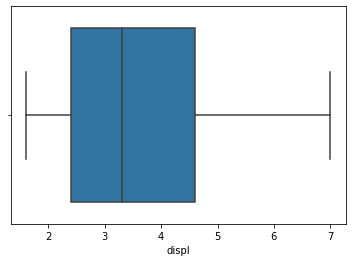

In [29]:
sns.boxplot(x=mpg.displ, data=mpg)

<AxesSubplot:xlabel='hwy'>

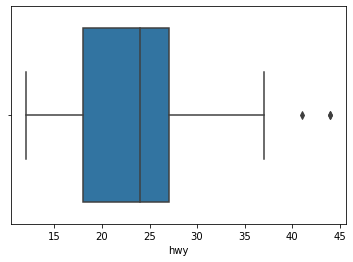

In [30]:
sns.boxplot(x=mpg.hwy, data=mpg)

Notice that `displ` and `hwy` have different units so they have very different scales. Here we can use a scaler so that the regression isn't skewed towards one or the other.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler_displ = MinMaxScaler()
scaler_hwy = MinMaxScaler()

mpg.displ = scaler_displ.fit_transform(mpg[['displ']])
mpg.hwy = scaler_hwy.fit_transform(mpg[['hwy']])

In [33]:
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)
mpg['yhat'] = model.predict(mpg[['displ']])

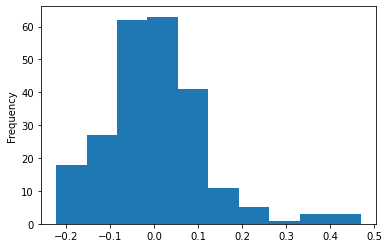

In [34]:
evaluate.plot_residuals('hwy', 'yhat', mpg)

In [35]:
evaluate.regression_errors('hwy', 'yhat', mpg)

Sum of squared errors (SSE): 3.3338173915971354
Explained sum of squares (ESS): 4.734212289225513
Total sum of squares (TSS): 8.068029680822647
Mean squared error (MSE): 0.014247082870073228
Root mean squared error (RMSE): 0.11936114472504537


In [36]:
evaluate.baseline_mean_errors('hwy', mpg)


    Baseline:

    sse:  8.068029680822647
    mse:  0.0344787593197549
    rmse: 0.18568456941747988
    


In [37]:
evaluate.better_than_baseline('hwy', 'yhat', mpg)

True